In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"D:\data\openparliament\vocab_count_df")

In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df.columns

Index(['member_id', ' ', '  ', '   ', '    ', '     ', '      ', '       ',
       '        ', '         ',
       ...
       'uber.1', 'uberminister', 'oeuvrant', 'qoyannamiik', ''', '"', '".1',
       '*', '*support', 'EUR'],
      dtype='object', length=68465)

df.index = df['member_id']

In [5]:
df_wordcount = df.transpose()

In [6]:
new_header = df_wordcount.iloc[0]

In [7]:
df_wordcount = df_wordcount[1:]

In [8]:
df_wordcount.columns = new_header

In [9]:
vocab_len = df_wordcount.sum(axis=0)

In [10]:
vocab_len.sort_values(ascending=False, inplace=True)

In [11]:
vocab_len.head()

member_id
177     11847
185     11388
11      10551
9187    10406
146     10021
dtype: int64

In [12]:
df_electedmember = pd.read_csv(r"D:\data\openparliament\core_electedmember.csv")

In [13]:
df_electedmember.head()

,id,politician_id,riding_id,party_id,end_date,start_date
0,4015,2693,70159,5,2000-09-11,2000-04-02
1,4016,2693,70159,4,2001-01-28,2000-09-12
2,4017,4136,59023,4,2005-05-23,2002-01-28
3,4018,4983,70116,5,2004-05-23,2002-08-20
4,4019,5258,70139,5,2003-03-14,2003-01-16


In [14]:
df.head()

,member_id,,,,,,,,,,...,uber.1,uberminister,oeuvrant,qoyannamiik,',"""",""".1",*,*support,EUR
0,3465,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,173,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,43,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,216,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,256,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [15]:
party_vocab = df.merge(df_electedmember, how='inner', left_on='member_id', right_on='politician_id')

In [16]:
party_vocab.drop(['politician_id'], axis=1, inplace=True)

In [17]:
party_vocab.head()

,member_id,,,,,,,,,,...,"""",""".1",*,*support,EUR,id_y,riding_id,party_id,end_date,start_date
0,3465,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3210,70224,4,1997-04-27,1994-01-17
1,3465,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2611,35066,4,2005-11-29,1997-09-22
2,173,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1534,47007,1,2015-10-19,2004-10-04
3,173,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,4305,70358,1,NaN,2015-10-19
4,43,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,3342,47014,28,2000-10-22,1994-01-17


In [18]:
vocab_len.index[:5]

Int64Index([177, 185, 11, 9187, 146], dtype='int64', name='member_id')

In [19]:
vocab_len.head()

member_id
177     11847
185     11388
11      10551
9187    10406
146     10021
dtype: int64

In [20]:
vocab_frame=vocab_len.to_frame()

In [21]:
vocab_frame.head()

,0
member_id,
177,11847
185,11388
11,10551
9187,10406
146,10021


In [22]:
vocab_frame.rename({0: 'vocab_size'}, axis=1, inplace=True)

In [23]:
vocab_frame.head()

,vocab_size
member_id,
177,11847
185,11388
11,10551
9187,10406
146,10021


In [24]:
vocab_frame.reset_index(inplace=True)

In [25]:
vocab_frame.head()

,member_id,vocab_size
0,177,11847
1,185,11388
2,11,10551
3,9187,10406
4,146,10021


In [26]:
party_vocab = df_electedmember.merge(vocab_frame, how='inner', left_on='politician_id', right_on='member_id')

In [27]:
party_vocab.head()

,id,politician_id,riding_id,party_id,end_date,start_date,member_id,vocab_size
0,4015,2693,70159,5,2000-09-11,2000-04-02,2693,3364
1,4016,2693,70159,4,2001-01-28,2000-09-12,2693,3364
2,2676,2693,70159,26,2000-04-01,1997-09-22,2693,3364
3,1774,2693,24016,4,2004-05-23,2001-01-29,2693,3364
4,4017,4136,59023,4,2005-05-23,2002-01-28,4136,2565


In [28]:
party_vocab.start_date[0]

'2000-04-02'

In [29]:
party_vocab_size = party_vocab.pivot_table(values='vocab_size', index='party_id', aggfunc='mean')

In [30]:
party_vocab_size.reset_index(inplace=True)

In [31]:
party_vocab_size.sort_values(by='vocab_size', inplace=True)

In [32]:
party_vocab_size.head()

,party_id,vocab_size
9,39,2555.000000
10,46,3137.428571
3,4,3231.884892
2,3,3701.369565
4,5,3929.684211


In [33]:
party_df = pd.read_csv(r"D:\data\openparliament\core_party.csv", sep='\t', header=None)

In [34]:
party_names = ['id', 'name_en', 'slug','short_name_en', 'name_fr', 'short_name_fr']

In [35]:
party_df.columns = party_names

In [36]:
party_df.head()

,id,name_en,slug,short_name_en,name_fr,short_name_fr
0,32,Abolitionist Party of Canada,NaN,Abolitionist Party of Canada,Abolitionist Party of Canada,Abolitionist Party of Canada
1,24,Animal Alliance Environment Voters Party of Ca...,NaN,Animal Alliance Environment Voters Party of Ca...,Animal Alliance Environment Voters Party of Ca...,Animal Alliance Environment Voters Party of Ca...
2,30,Canada Party,NaN,Canada Party,Canada Party,Canada Party
3,16,Canadian Action Party,NaN,Canadian Action Party,Canadian Action Party,Canadian Action Party
4,10,Christian Heritage Party of Canada,NaN,Christian Heritage Party of Canada,Christian Heritage Party of Canada,Christian Heritage Party of Canada


In [37]:
party_vocab_size = party_vocab_size.merge(party_df, how='inner', left_on='party_id', right_on='id')

In [38]:
party_vocab_size.sort_values(by='vocab_size', inplace=True, ascending=False)

In [39]:
party_vocab_size

,party_id,vocab_size,id,name_en,slug,short_name_en,name_fr,short_name_fr
10,25,5608.895522,25,Canadian Alliance,alliance,Canadian Alliance,Canadian Alliance,Canadian Alliance
9,2,5133.186047,2,New Democratic Party,NDP,NDP,Nouveau Parti démocratique,NPD
8,28,4562.573333,28,Reform Party of Canada,reform,Reform,Reform Party of Canada,Reform
7,9,4518.800000,9,Green Party of Canada,green,Green,Parti verti du Canada,Vert
6,26,4412.375000,26,Progressive Conservative,pc,Progressive Conservative,Progressive Conservative,Progressive Conservative
5,1,4402.073171,1,Conservative Party of Canada,cpc,Conservative,Parti conservateur du Canada,Conservateur
4,5,3929.684211,5,Independent,IND,Independent,Indépendant,Indépendant
3,3,3701.369565,3,Bloc Québécois,bloc,Bloc,Bloc Québécois,Bloc
2,4,3231.884892,4,Liberal Party of Canada,liberal,Liberal,Parti libéral du Canada,Libéral
1,46,3137.428571,46,Québec debout,NaN,Québec debout,Québec debout,Québec debout


In [40]:
from matplotlib import pyplot as plt

<AxesSubplot:>

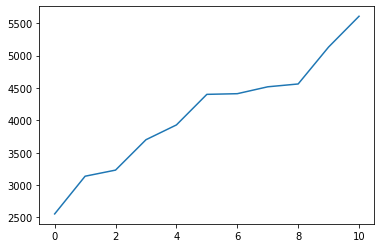

In [41]:
party_vocab_size.vocab_size.plot()

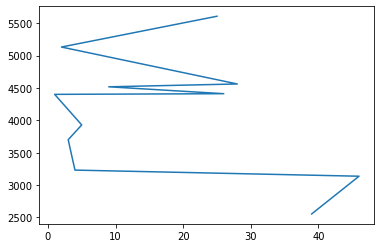

In [42]:
plt.plot(party_vocab_size.id, party_vocab_size.vocab_size,)

In [43]:
party_vocab_size.fillna('', inplace=True)

In [44]:
y_data = party_vocab_size.vocab_size.values

In [45]:
x_data = party_vocab_size.slug.values

In [46]:
type(x_data[1])

str

<BarContainer object of 11 artists>

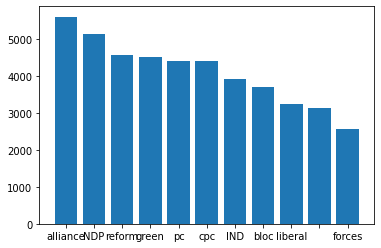

In [47]:
plt.bar(x_data, y_data)

## party_vocab

In [52]:
party_vocab.start_date[0]

'2000-04-02'

In [53]:
from datetime import datetime

In [58]:
datetime.strptime(party_vocab.start_date[0], '%Y%m%d')

ValueError: time data '2000-04-02' does not match format '%Y%m%d'

In [63]:
tenure = pd.to_datetime(party_vocab.end_date, infer_datetime_format=True) - pd.to_datetime(party_vocab.start_date, infer_datetime_format=True)  

In [65]:
party_vocab.start_date = pd.to_datetime(party_vocab.start_date, infer_datetime_format=True)

In [66]:
party_vocab.end_date = pd.to_datetime(party_vocab.end_date, infer_datetime_format=True)